In [20]:
import pandas as pd
import numpy as np
import json
import os
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

plt.rc('figure', dpi=150)

SMALL_SIZE=17
MEDIUM_SIZE=17
BIGGER_SIZE=17

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE+5)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [23]:
EXPERIMENTS_PATH = '../logs/experiments/'
experiment_files = [e for e in os.listdir(EXPERIMENTS_PATH) if 'experiment' in e]
experiments = []
for experiment in experiment_files:
    with open(f'{EXPERIMENTS_PATH}/{experiment}', 'rb') as f:
        try:
            _json = eval(json.load(f))
            _json['name'] = experiment
            if experiment != experiment:
                print(_json)
            experiments.append(_json)
        except Exception as e:
            print(f'Problem loading file {experiment}')
            print(e)
            
experiments = pd.DataFrame(experiments)
experiments['datetime'] = experiments['name'].apply(lambda x: datetime.fromtimestamp(int(x.split('_')[1].split('.')[0])))
time_of_interest = datetime(2019, 6, 25, 0)
experiments = experiments.loc[experiments['datetime'] >= time_of_interest]
experiments = experiments.set_index('datetime')
columns_to_mean = ['loss', 'precision_positives', 'precision_negatives', 'recall_positives', 'recall_negatives']
for col in columns_to_mean:
    experiments[f'{col}_last_epoch'] = experiments[col].apply(lambda x: np.nan if isinstance(x, float) else x[-1])
    experiments[f'val_{col}_last_epoch'] = experiments[f'val_{col}'].apply(lambda x: np.nan if isinstance(x, float) else x[-1])
    
spaces = pd.DataFrame(experiments['space'].tolist(), index=experiments.index)
experiments = experiments.join(spaces)

#experiments['class_weight'] = experiments['class_weight'].apply(lambda x: x[1])
experiments['n_layers'] = experiments['convolutional_layers'].apply(len)
experiments['dropout'] = experiments['convolutional_layers'].apply(lambda x: x[0]['dropout'] if x else np.nan)
experiments['filters_first_layer'] = experiments['convolutional_layers'].apply(lambda x: x[0]['filters'] if x else np.nan)
experiments['n_filters'] = experiments['convolutional_layers'].apply(lambda x: sum(layer['filters'] for layer in x))
experiments['activation'] = experiments['convolutional_layers'].apply(lambda x: x[0]['activation'] if x else np.nan)
if 'log' in experiments:
    experiments = experiments.loc[experiments['log'].isnull()]
experiments = experiments.loc[experiments['model'] == "<class 'damage.models.cnn.CNN'>"]
metrics = [m for m in experiments if 'last_epoch' in m]
#experiments = experiments.loc[experiments['features'] == 'example_daraa.p']
print(experiments.shape)
experiments.head()

(3, 52)


,accuracy,false_negatives,false_positives,features,loss,model,name,negatives,num_batches_test,num_batches_train,...,convolutional_layers,dense_units,epochs,layer_type,learning_rate,n_layers,dropout,filters_first_layer,n_filters,activation
datetime,,,,,,,,,,,,,,,,,,,,,
2019-07-23 16:50:02,"[0.4729064, 0.47947454, 0.500821, 0.5123153, 0...","[3.125, 2.9166667, 2.75, 2.8333333, 2.7083333,...","[10.25, 10.291667, 9.916667, 9.541667, 10.2083...",test_daraa.p,"[3.2779477617423525, 3.1167680101441633, 3.070...",<class 'damage.models.cnn.CNN'>,experiment_1563893402.json,"[19.541666, 19.541666, 19.541666, 19.541666, 1...",10,24,...,"[{'kernel_size': [3, 3], 'pool_size': [2, 2], ...",64,7,cnn,0.033932,6,0.333333,16,1008,relu
2019-07-23 18:46:09,"[0.4664372, 0.4698795, 0.5043029, 0.4870912, 0...","[2.8333333, 3.0555556, 3.1666667, 2.8333333, 2...","[14.388889, 14.055555, 12.833333, 13.722222, 1...",test_daraa.p,"[7.747854771999812, 8.02643360738705, 7.339660...",<class 'damage.models.cnn.CNN'>,experiment_1563900369.json,"[26.944445, 26.944445, 26.944445, 26.944445, 2...",8,18,...,"[{'kernel_size': [7, 7], 'pool_size': [6, 6], ...",128,6,cnn,0.001758,3,0.333333,32,224,relu
2019-07-24 14:25:46,"[0.5628227, 0.5748709, 0.59380376, 0.5748709, ...","[3.0526316, 3.1578948, 3.0, 3.1052632, 3.15789...","[10.315789, 9.842105, 9.421053, 9.894737, 9.68...",example_daraa.p,"[6.438632979860815, 6.363179270864149, 6.03538...",<class 'damage.models.cnn.CNN'>,experiment_1563971146.json,"[24.578947, 24.578947, 24.578947, 24.578947, 2...",9,19,...,"[{'kernel_size': [5, 5], 'pool_size': [4, 4], ...",128,12,vgg,0.212095,2,0.177778,32,96,relu


In [8]:
experiments_high_recall = experiments.loc[experiments['val_recall_positives_last_epoch'] >= 0.4]
experiments_high_recall_highest_precision = experiments_high_recall.loc[
    experiments_high_recall['val_precision_positives_last_epoch'].idxmax()
]
print(experiments_high_recall_highest_precision['name'])
print(experiments_high_recall_highest_precision[metrics])
print(experiments_high_recall_highest_precision['space'])

experiment_1563900369.json
loss_last_epoch                         7.5307
val_loss_last_epoch                    11.1705
precision_positives_last_epoch        0.159938
val_precision_positives_last_epoch     0.19868
precision_negatives_last_epoch        0.830179
val_precision_negatives_last_epoch        0.65
recall_positives_last_epoch           0.503704
val_recall_positives_last_epoch       0.776786
recall_negatives_last_epoch           0.480294
val_recall_negatives_last_epoch       0.127708
Name: 2019-07-23 18:46:09, dtype: object
{'dense_units': 128, 'batch_size': 33, 'convolutional_layers': [{'kernel_size': [7, 7], 'pool_size': [6, 6], 'filters': 32, 'dropout': 0.33333333333333337, 'activation': 'relu'}, {'kernel_size': [7, 7], 'pool_size': [6, 6], 'filters': 64, 'dropout': 0.33333333333333337, 'activation': 'relu'}, {'kernel_size': [7, 7], 'pool_size': [6, 6], 'filters': 128, 'dropout': 0.33333333333333337, 'activation': 'relu'}], 'epochs': 6, 'layer_type': 'cnn', 'class_weight': 1

In [9]:
best_performing_precision_metrics = experiments.loc[experiments['val_precision_positives_last_epoch'].idxmax(), metrics]
print(best_performing_precision_metrics)
best_performing_precision_space = experiments.loc[experiments['val_precision_positives_last_epoch'].idxmax(), 'space']
best_performing_precision_space

loss_last_epoch                         7.5307
val_loss_last_epoch                    11.1705
precision_positives_last_epoch        0.159938
val_precision_positives_last_epoch     0.19868
precision_negatives_last_epoch        0.830179
val_precision_negatives_last_epoch        0.65
recall_positives_last_epoch           0.503704
val_recall_positives_last_epoch       0.776786
recall_negatives_last_epoch           0.480294
val_recall_negatives_last_epoch       0.127708
Name: 2019-07-23 18:46:09, dtype: object


{'dense_units': 128,
 'batch_size': 33,
 'convolutional_layers': [{'kernel_size': [7, 7],
   'pool_size': [6, 6],
   'filters': 32,
   'dropout': 0.33333333333333337,
   'activation': 'relu'},
  {'kernel_size': [7, 7],
   'pool_size': [6, 6],
   'filters': 64,
   'dropout': 0.33333333333333337,
   'activation': 'relu'},
  {'kernel_size': [7, 7],
   'pool_size': [6, 6],
   'filters': 128,
   'dropout': 0.33333333333333337,
   'activation': 'relu'}],
 'epochs': 6,
 'layer_type': 'cnn',
 'class_weight': 1.15,
 'learning_rate': 0.0017575106248547913}

In [10]:
best_performing_recall_metrics = experiments.loc[experiments['val_precision_negatives_last_epoch'].idxmax(), metrics]
print(best_performing_recall_metrics)
best_performing_recall_space = experiments.loc[experiments['val_precision_negatives_last_epoch'].idxmax(), 'space']
best_performing_recall_space

loss_last_epoch                         3.1404
val_loss_last_epoch                    2.42298
precision_positives_last_epoch        0.231729
val_precision_positives_last_epoch           0
precision_negatives_last_epoch        0.766486
val_precision_negatives_last_epoch    0.846405
recall_positives_last_epoch           0.520833
val_recall_positives_last_epoch              0
recall_negatives_last_epoch           0.481031
val_recall_negatives_last_epoch       0.990476
Name: 2019-07-23 16:50:02, dtype: object


{'dense_units': 64,
 'batch_size': 26,
 'convolutional_layers': [{'kernel_size': [3, 3],
   'pool_size': [2, 2],
   'filters': 16,
   'dropout': 0.33333333333333337,
   'activation': 'relu'},
  {'kernel_size': [3, 3],
   'pool_size': [2, 2],
   'filters': 32,
   'dropout': 0.33333333333333337,
   'activation': 'relu'},
  {'kernel_size': [3, 3],
   'pool_size': [2, 2],
   'filters': 64,
   'dropout': 0.33333333333333337,
   'activation': 'relu'},
  {'kernel_size': [3, 3],
   'pool_size': [2, 2],
   'filters': 128,
   'dropout': 0.33333333333333337,
   'activation': 'relu'},
  {'kernel_size': [3, 3],
   'pool_size': [2, 2],
   'filters': 256,
   'dropout': 0.33333333333333337,
   'activation': 'relu'},
  {'kernel_size': [3, 3],
   'pool_size': [2, 2],
   'filters': 512,
   'dropout': 0.33333333333333337,
   'activation': 'relu'}],
 'epochs': 7,
 'layer_type': 'cnn',
 'class_weight': {0: 0.345, 1: 0.655},
 'learning_rate': 0.03393221771895328}

/Users/jordi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


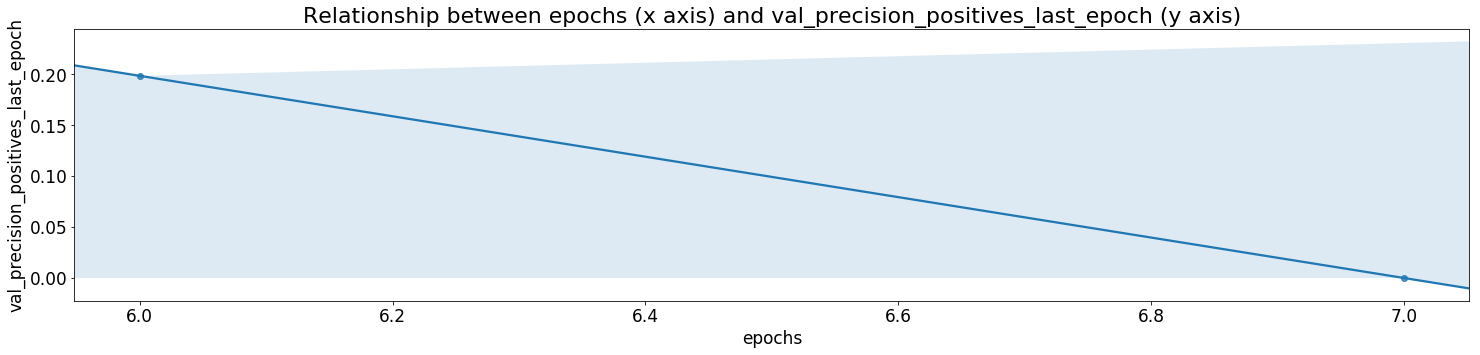

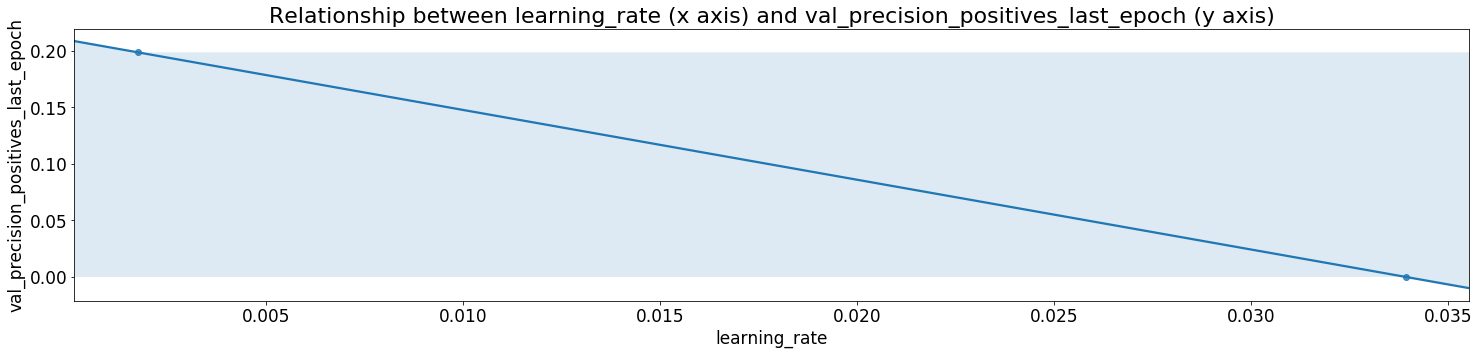

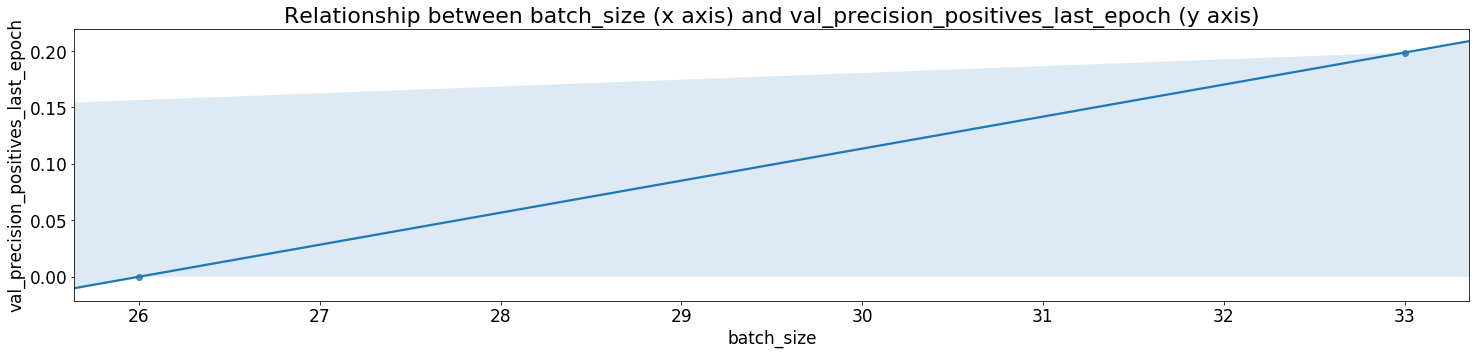

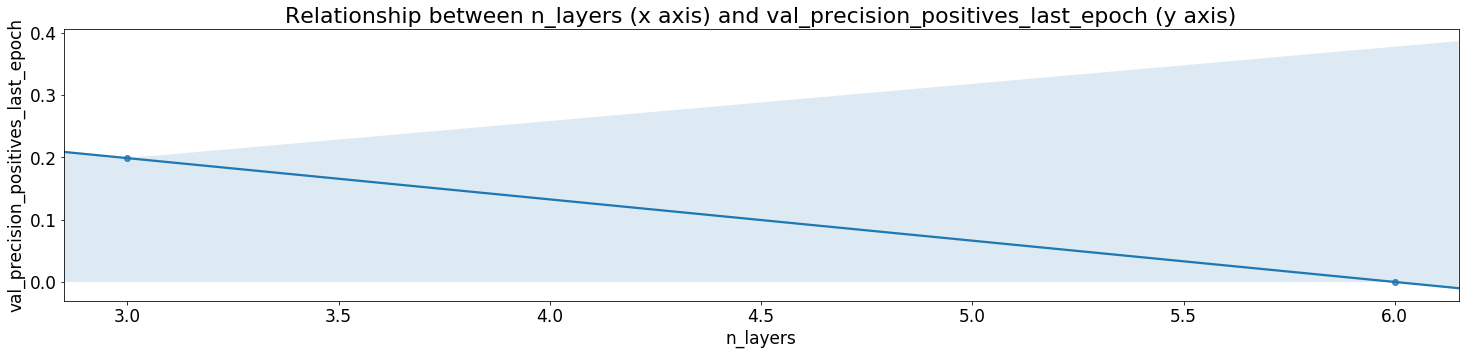

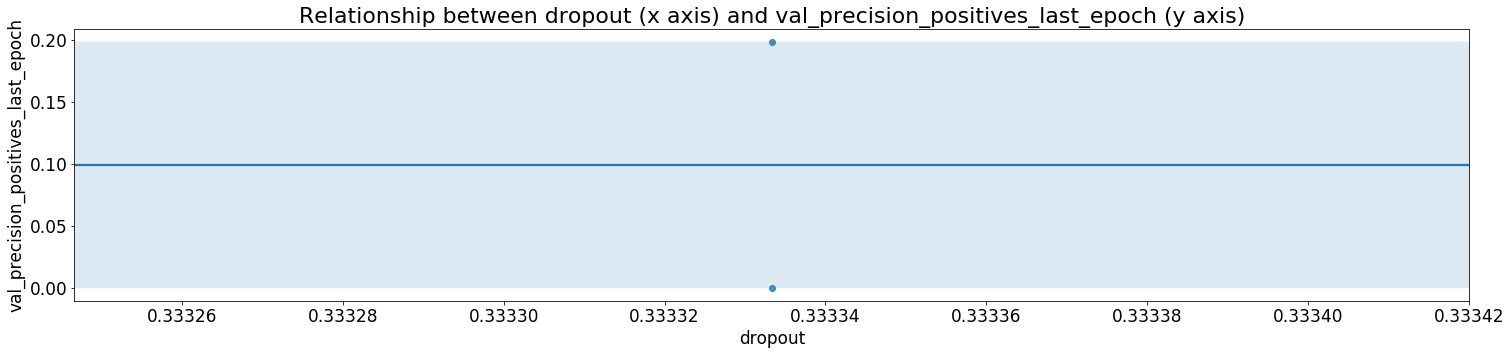

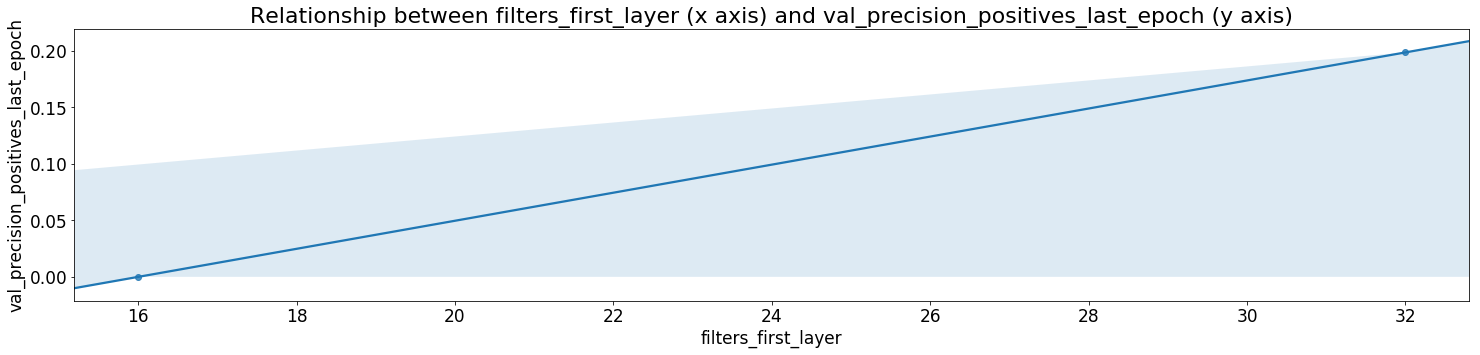

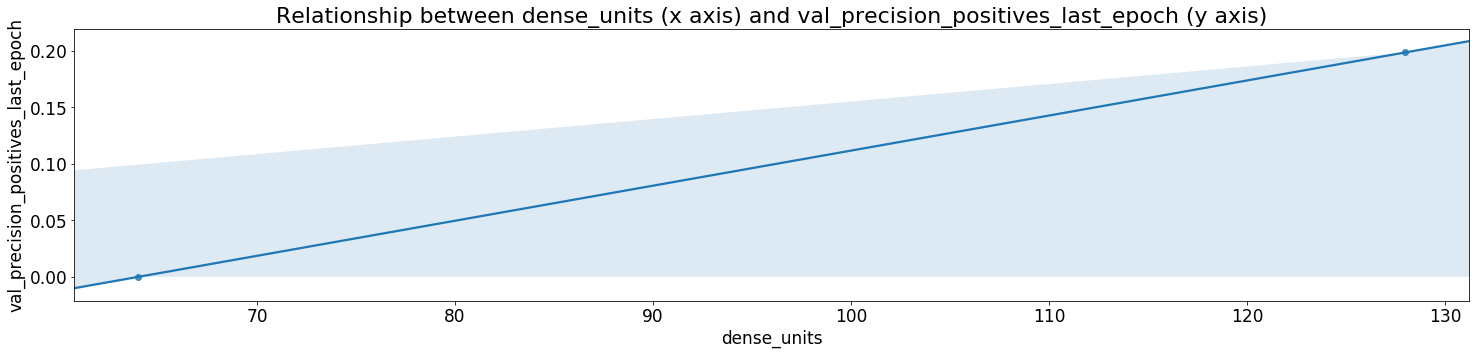

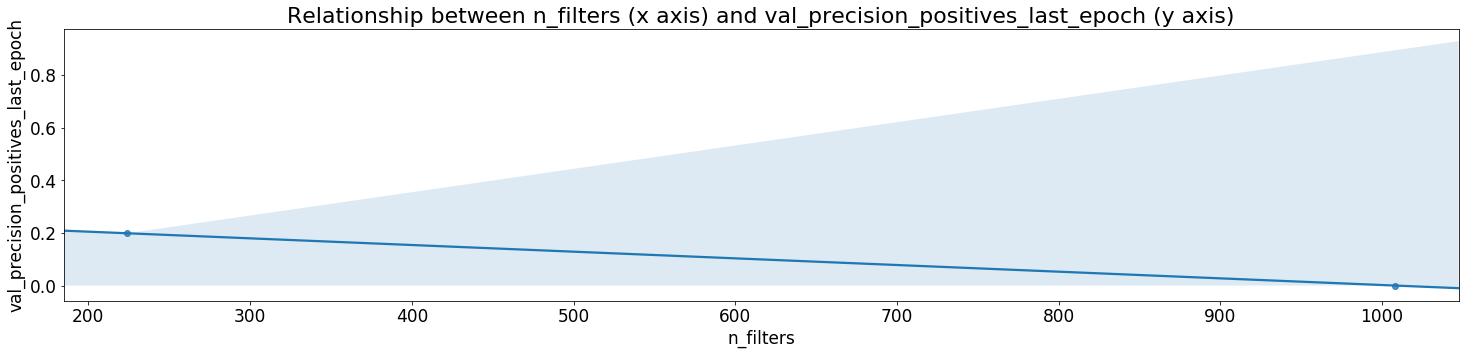

In [11]:
parameters = ['epochs', 'learning_rate', 'batch_size', 'n_layers', 'dropout', 'filters_first_layer', 'dense_units', 'n_filters']
metric = 'val_precision_positives_last_epoch'
for parameter in parameters:
    fig, ax = plt.subplots(figsize=(25, 5))
    _experiments = experiments[[parameter, metric]].dropna()
    sns.regplot(_experiments[parameter], _experiments[metric])
    ax.set_title(f'Relationship between {parameter} (x axis) and {metric} (y axis)')

activation
relu    2
Name: val_precision_positives_last_epoch, dtype: int64


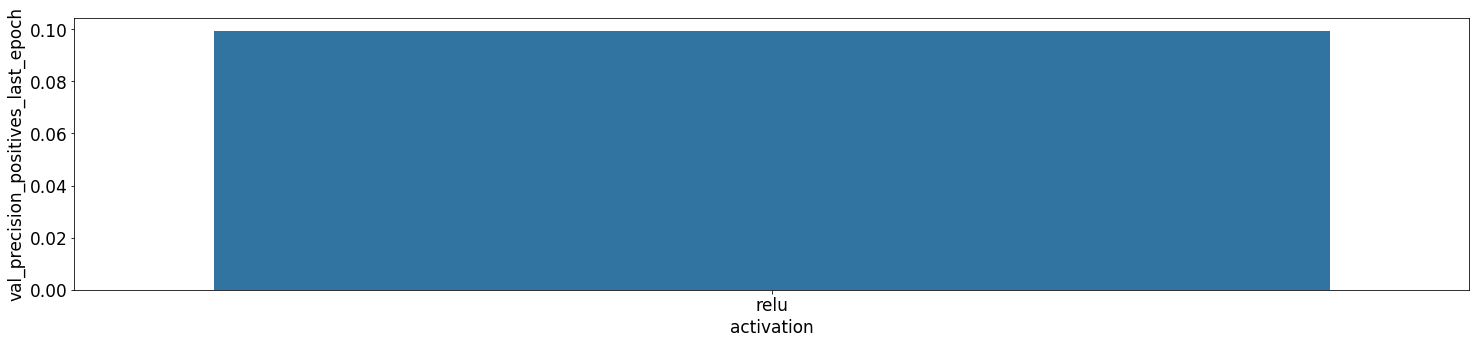

In [12]:
fig, ax = plt.subplots(figsize=(25, 5))
print(experiments.groupby('activation')[metric].count())
sns.barplot(x=experiments.groupby('activation')[metric].mean().index, y=experiments.groupby('activation')[metric].mean(), ax=ax)

Count of experiments per layer type {'cnn': 2}


Text(0.5, 1.0, 'Average performance per layer type')

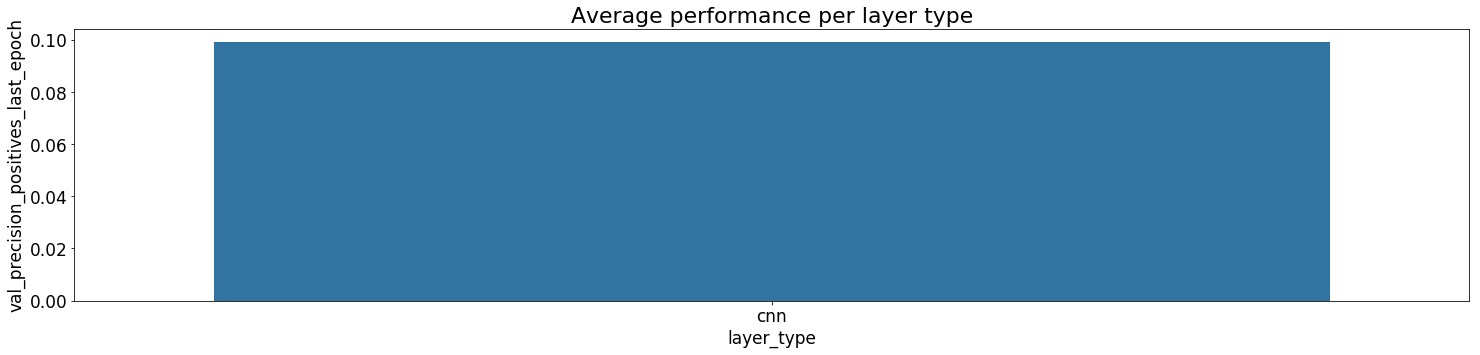

In [13]:
fig, ax = plt.subplots(figsize=(25, 5))
print('Count of experiments per layer type', experiments.groupby('layer_type')[metric].count().to_dict())
sns.barplot(x=experiments.groupby('layer_type')[metric].mean().index, y=experiments.groupby('layer_type')[metric].mean(), ax=ax)
ax.set_title('Average performance per layer type')

Count of experiments per layer type {'cnn': 2}


Text(0.5, 1.0, 'Best performance per layer type')

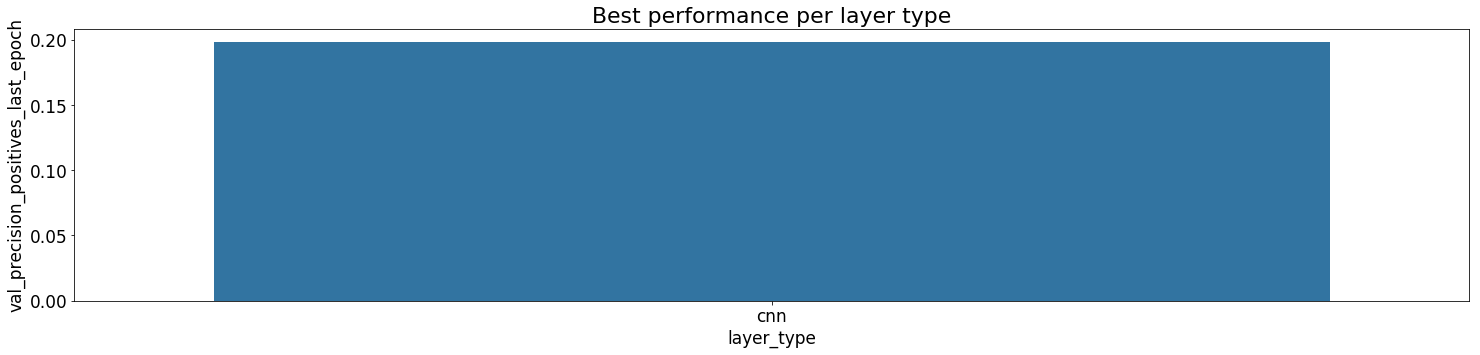

In [14]:
fig, ax = plt.subplots(figsize=(25, 5))
print('Count of experiments per layer type', experiments.groupby('layer_type')[metric].count().to_dict())
sns.barplot(x=experiments.groupby('layer_type')[metric].max().index, y=experiments.groupby('layer_type')[metric].max(), ax=ax)
ax.set_title('Best performance per layer type')

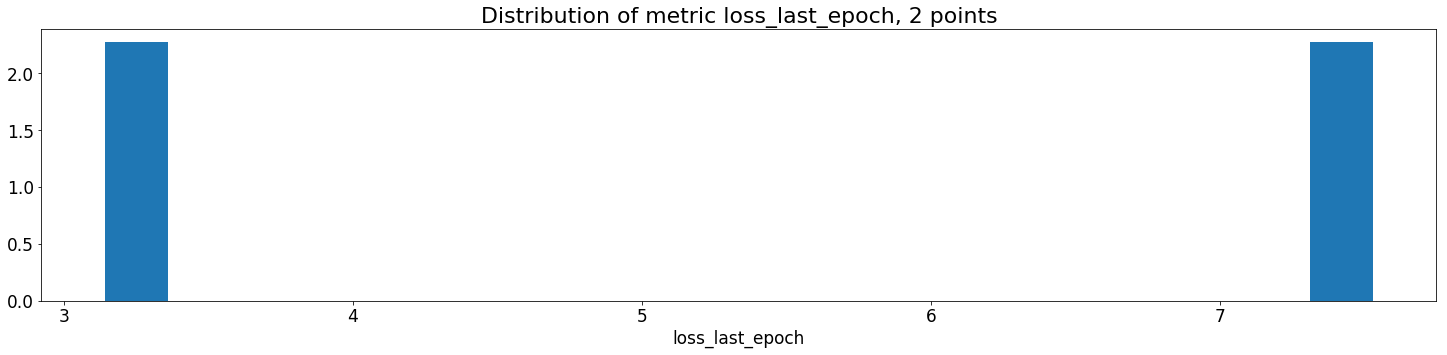

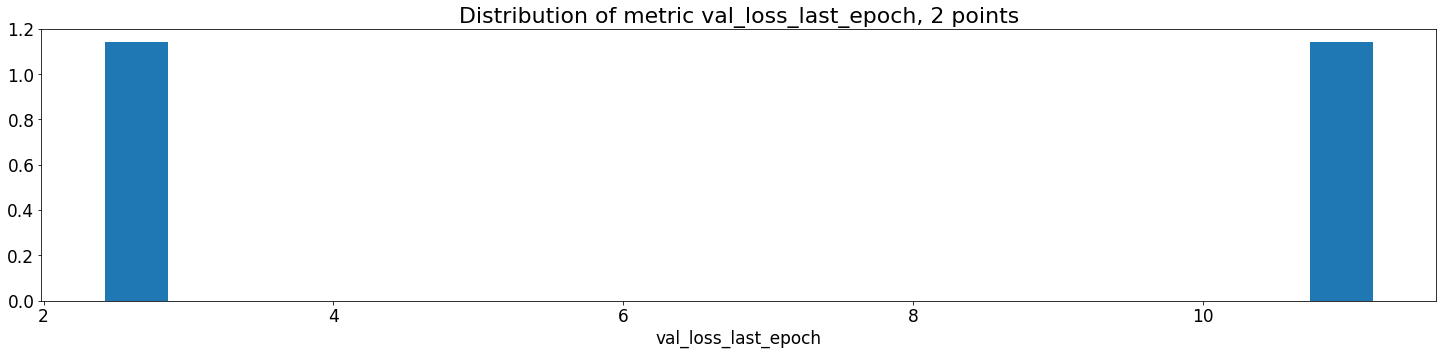

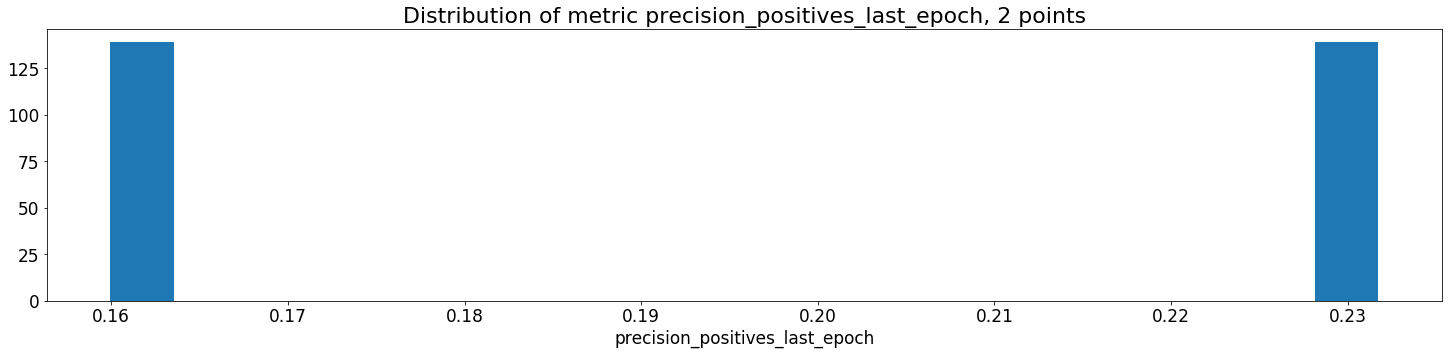

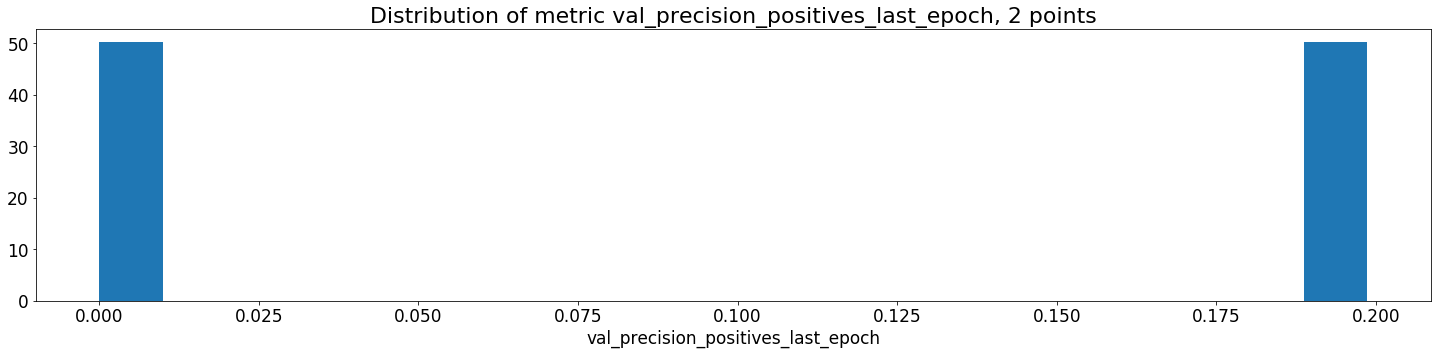

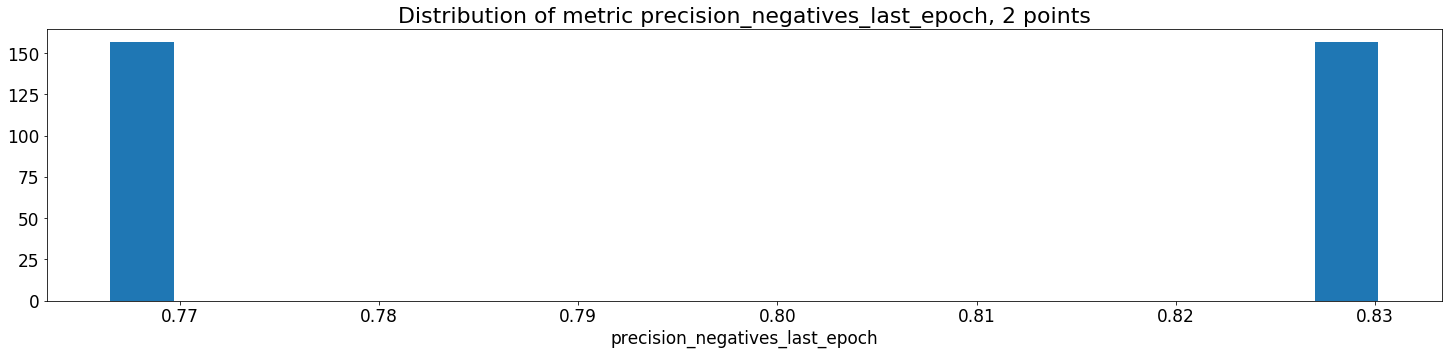

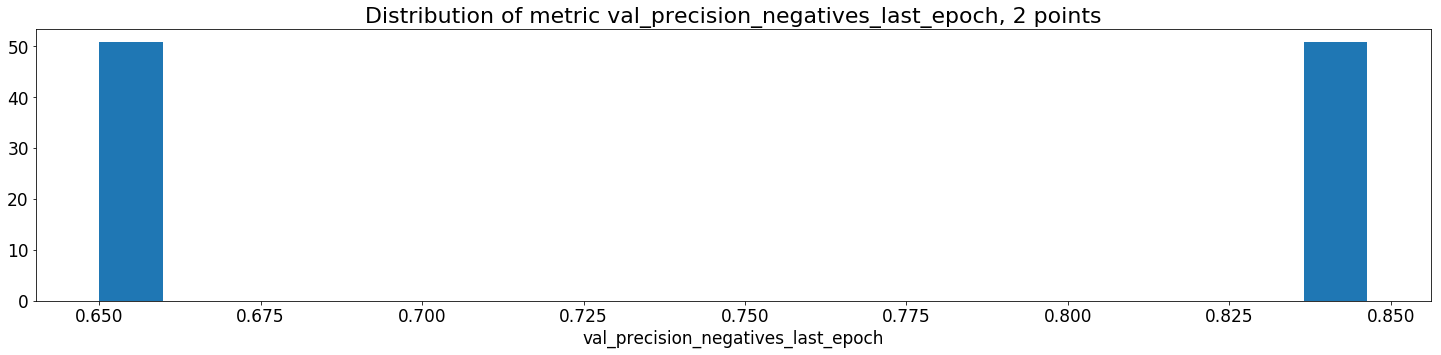

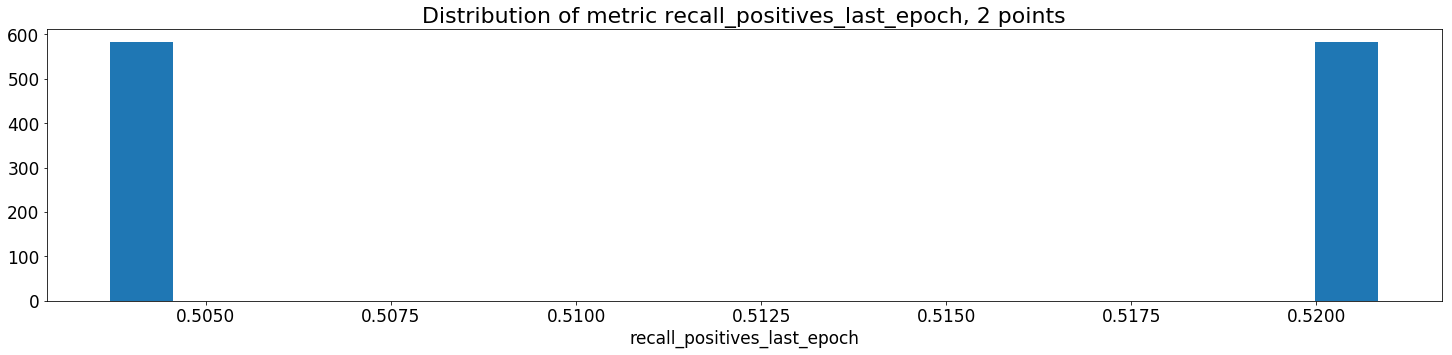

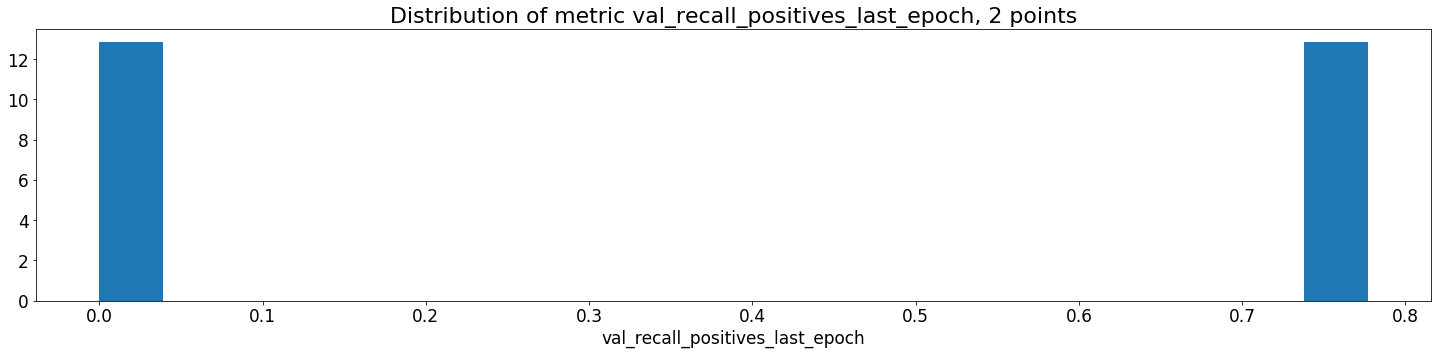

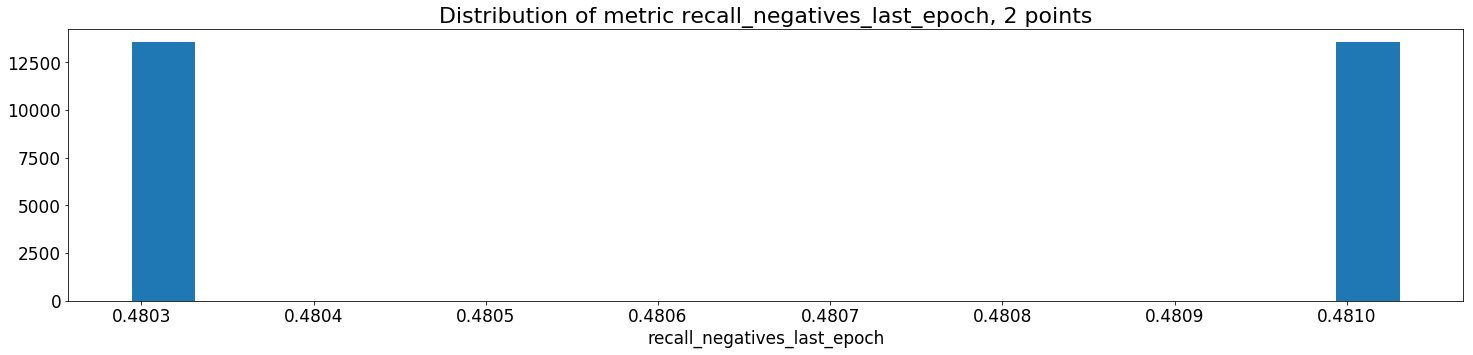

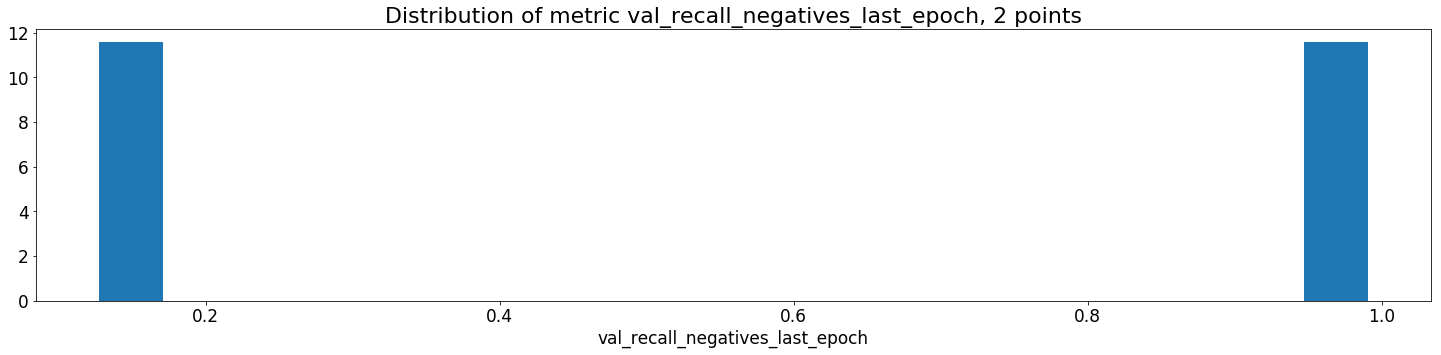

In [15]:
for _metric in metrics:
    fig, ax = plt.subplots(figsize=(25, 5))
    ax.hist(experiments[_metric].dropna(), bins=20, density=True)
    ax.set_xlabel(_metric)
    ax.set_title(f'Distribution of metric {_metric}, {experiments[_metric].dropna().shape[0]} points')

In [16]:
experiments[metrics]

,loss_last_epoch,val_loss_last_epoch,precision_positives_last_epoch,val_precision_positives_last_epoch,precision_negatives_last_epoch,val_precision_negatives_last_epoch,recall_positives_last_epoch,val_recall_positives_last_epoch,recall_negatives_last_epoch,val_recall_negatives_last_epoch
datetime,,,,,,,,,,
2019-07-23 16:50:02,3.140400,2.422976,0.231729,0.00000,0.766486,0.846405,0.520833,0.000000,0.481031,0.990476
2019-07-23 18:46:09,7.530703,11.170467,0.159938,0.19868,0.830179,0.650000,0.503704,0.776786,0.480294,0.127708


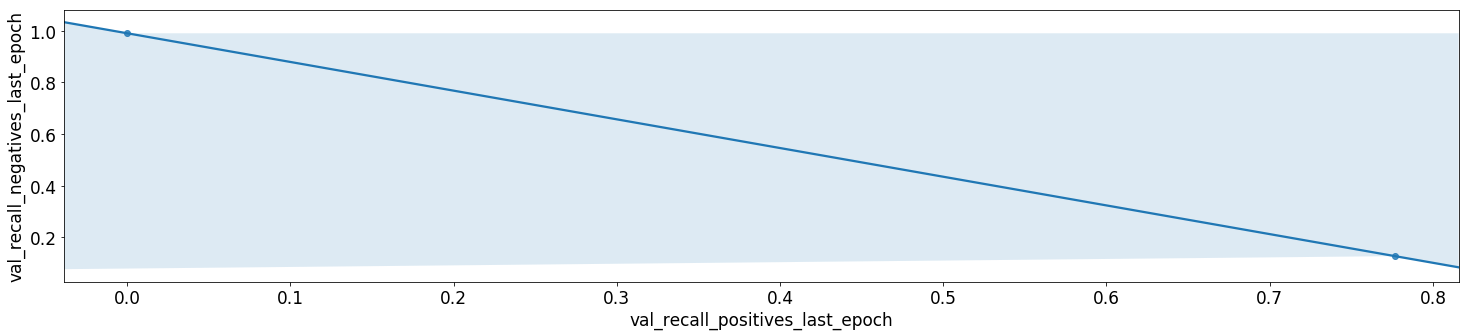

In [17]:
fig, ax = plt.subplots(figsize=(25, 5))
sns.regplot(experiments['val_recall_positives_last_epoch'], experiments['val_recall_negatives_last_epoch'])

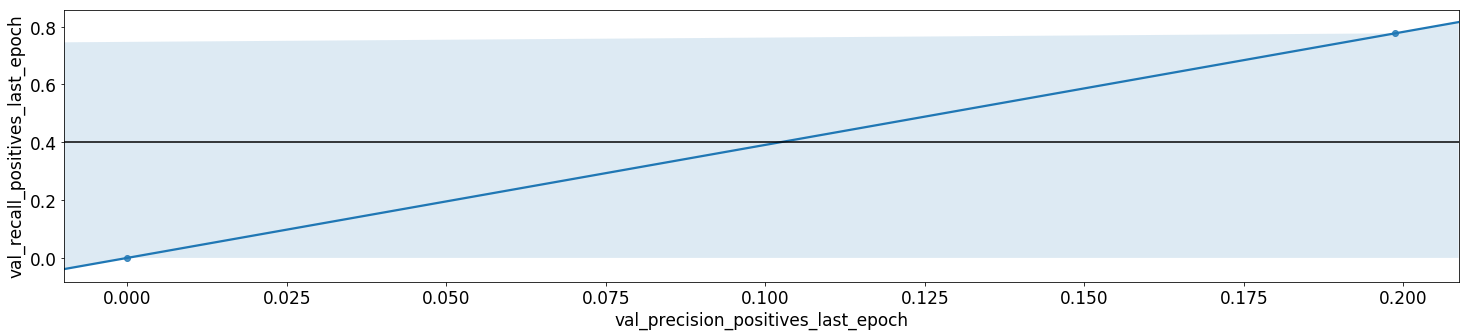

In [18]:
fig, ax = plt.subplots(figsize=(25, 5))
sns.regplot(experiments['val_precision_positives_last_epoch'], experiments['val_recall_positives_last_epoch'])
ax.axhline(0.4, color='black')

In [19]:
experiments[metrics].to_csv('../figures/experiments.csv')

In [19]:
experiments[metrics]

,loss_last_epoch,val_loss_last_epoch,precision_positives_last_epoch,val_precision_positives_last_epoch,precision_negatives_last_epoch,val_precision_negatives_last_epoch,recall_positives_last_epoch,val_recall_positives_last_epoch,recall_negatives_last_epoch,val_recall_negatives_last_epoch
datetime,,,,,,,,,,
2019-06-26 16:35:52,0.272954,0.469919,0.000000,0.000000,0.769399,0.982744,0.000000,0.000000,1.000000,1.000000
2019-06-30 03:15:10,2.257556,0.314401,0.232408,0.000000,0.769830,0.982011,0.273402,0.000000,0.728710,1.000000
2019-06-25 23:09:21,0.208773,0.563941,0.553459,0.072466,0.873470,0.994591,0.572500,0.794728,0.864990,0.723444
2019-06-26 17:51:45,0.208664,0.357462,0.550690,0.116938,0.870138,0.990627,0.554624,0.559351,0.871554,0.855637
2019-06-29 22:56:57,0.273032,0.453662,0.000000,0.000000,0.769445,0.982011,0.000000,0.000000,1.000000,1.000000
2019-07-02 23:03:29,0.184120,0.318268,0.643418,0.164245,0.897500,0.992219,0.656937,0.585835,0.886848,0.905042
2019-06-29 20:45:13,0.218727,0.335042,0.514467,0.124466,0.864839,0.989939,0.556352,0.532263,0.841819,0.869678
2019-06-30 10:12:14,0.273088,0.332443,0.000094,0.000000,0.769446,0.982011,0.000009,0.000000,1.000000,1.000000
2019-06-27 02:34:51,0.272908,0.460317,0.000000,0.000000,0.769399,0.982744,0.000000,0.000000,1.000000,1.000000
